<a title="By Marcelo Catanho [Public domain or Public domain], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Logo-ufpe-2-2.jpg"><img width="128" alt="Logo-ufpe-2-2" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Logo-ufpe-2-2.jpg/512px-Logo-ufpe-2-2.jpg"></a>
<h1>Universidade Federal de Pernambuco</h1>

Centro de Tecnologia e Geociências (CTG)  

Department: Engenharia Biomédica

Course: Tópicos Especiais em Engenharia Biomédica



In [1]:
%matplotlib inline

**1** Please, based on theoretical class, explain each step to used to calculate the PCA based on the following code (21-25).

In [2]:
from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure

def princomp(A):
 """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

 Returns :  
  coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
  score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
  latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
 """
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # 
 [latent,coeff] = linalg.eig(cov(M)) # 
 score = dot(coeff.T,M) # z_k
 return coeff,score,latent

**2** Please, explain each part of used on the following code. 

**3** Please, describe the input data (dimension, size, range, etc).

[[ 2.4  0.7  2.9  2.2  3.   2.7  1.6  1.1  1.6  0.9]
 [ 2.5  0.5  2.2  1.9  3.1  2.3  2.   1.   1.5  1.1]]


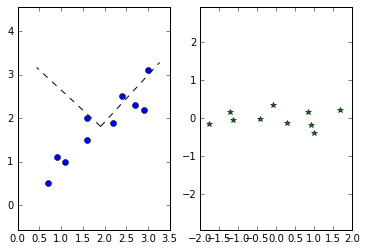

In [3]:
A = array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
            [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])
#A d2 s10 r(ampl)
print (A)

coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()


In [4]:
import numpy as np
a1=np.max(score[0])-np.min(score[0])
a2=np.max(score[1])-np.min(score[1])
print(a1,a2)

3.45338174392 0.734199686978


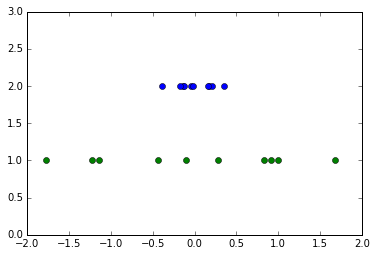

In [5]:
import matplotlib.pyplot as plt
plt.figure()
t1=[1]*len(score[0,:])
t2=[2]*len(score[1,:])
plt.plot(score[1],t2,'o')
plt.plot(score[0],t1,'o')
plt.ylim(0,3);

**4** Please, explain each part of used on the following code. 

**5** Please, describe the input data (dimension, size, range, etc).


In [6]:
perc = cumsum(latent)/sum(latent)
perc

array([ 0.96318131,  1.        ])

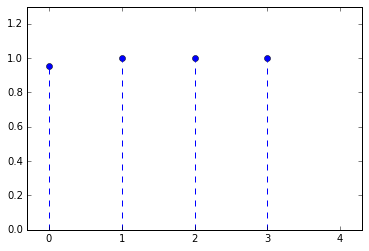

the principal component scores
[[-1.09587304 -0.82942822  0.          0.        ]
 [-2.79997893  0.61833664  0.          0.        ]
 [ 3.89585197  0.21109158  0.          0.        ]]
The rank of A is
2


/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [7]:
A = array([[-1, 1, 0, 0],
           [-2, 3, 0, 0],
           [ 4, 0, 0,0]],dtype=double)

coeff, score, latent = princomp(A)
perc = cumsum(latent)/sum(latent) #representa quanto da variancia do dado cada componente representa do original.
figure()
# the following plot shows that first two components 
# account for 100% of the variance.
stem(range(len(perc)),perc,'--b')
axis([-0.3,4.3,0,1.3])
show()
print ('the principal component scores')
print (score.T) # only the first two columns are nonzero
print ('The rank of A is')
print (rank(A))  # indeed, the rank of A is 2

**6** Please, select 10 clusters of SUA from your sample data and arrage them in format similar to previous input data used until here today, using some 300s-long time period.


In [8]:
import sys
sys.path.append('/home/harison/UFPE/IC/src/ipy/classes/') 
import kwikfile as kf

In [9]:
kpath="/home/harison/UFPE/data/g01.kwik"
kw=kf.KwikFile(kpath)

Created class on = /home/harison/UFPE/data/g01.kwik !


In [10]:
cluster_list=kw.clusters(group_name='good')[:10]

In [11]:
a=0
b=300
data=np.zeros((10,1499))
#n=0
#
#for i in cluster_list:
for i in range(0,len(cluster_list)):
    
    spikes=np.array(kw.spikes_on_cluster(cluster_id=cluster_list[i]))/kw.sampling_rate()
    binnep_pop,bins=np.histogram(spikes,bins=np.arange(a,b,0.2))
    #print(binnep_pop.shape);
    #figure()
    #plot(binnep_pop)
    data[i,:]=binnep_pop
    #n=n+1

In [12]:
data.shape

(10, 1499)

**7** Please, apply the PCA over the neuronal data provided on the previous questions;


In [13]:
coeff, score, latent = princomp(data)

/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


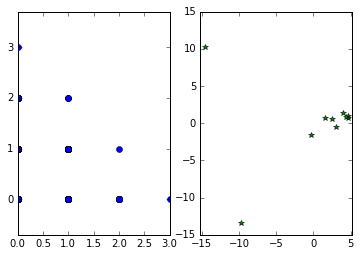

In [14]:
A=data
figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
#axis([-0.05,0.05,-1,1])
axis('equal')

show()

/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


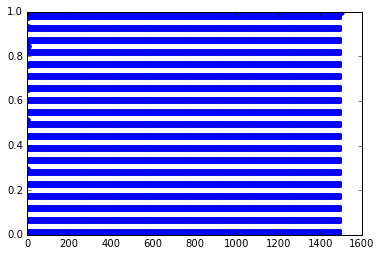

the principal component scores
[[  1.50446962+0.j   0.71185087+0.j  -0.92853659+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]
 [ -0.27155349+0.j  -1.61378102+0.j  13.06181483+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]
 [-14.62509661+0.j  10.25398043+0.j  -0.76785291+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]
 ..., 
 [  4.67300530+0.j   0.92054787+0.j  -1.60271294+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]
 [  4.30679209+0.j   0.84680761+0.j  -1.54384268+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]
 [ -9.76890412+0.j -13.44061841+0.j  -2.71099477+0.j ...,   0.00000000+0.j
    0.00000000+0.j   0.00000000+0.j]]
The rank of A is
2


/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [15]:
perc = cumsum(latent)/sum(latent) #representa quanto da variancia do dado cada componente representa do original.
figure()
# the following plot shows that first two components 
# account for 100% of the variance.
stem(range(len(perc)),perc,'--b')
#axis([-0.3,4.3,0,1.3])
show()
print ('the principal component scores')
print (score.T) # only the first two columns are nonzero
print ('The rank of A is')
print (rank(A))  # indeed, the rank of A is 2

**8** Please, explian the output results.


**9** Please, plot the Coefficient of Variation of that neuronal population activity during the whole data, highlighting the time period used in exercise 7  


In [17]:
from scipy.signal import butter, lfilter

sample_rate = 30000

nyq = 0.5 * sample_rate
low = 300 / nyq
high = 7200/ nyq
#b, a = butter(5, [low, high], btype='band')
b, a = butter(3,  [low, high], btype='band')
sub_sampling = 10

def calc_cv (pop_data,a,b,t0,width):
    
    num_samples = pop_data.shape[0]
    num_channels = pop_data.shape[1]

    t=np.linspace(t0, t0+width,num=(int(num_samples/sub_sampling)))
    spike_times = np.array([])
    for channel in range(0,num_channels):
        signal = pop_data[:,channel] 
        sf = lfilter(b, a, signal)
        sf = sf[::sub_sampling]
        th = 4.0*np.median(np.abs(sf)/0.6745)
        spike_id = np.argwhere(sf>th)
        spike_times = np.append(spike_times,t[spike_id])
     
    spike_times = np.unique(spike_times)
    num_spikes = len(spike_times)
    count,edges = np.histogram (spike_times, bins=np.arange(t0,t0+width,50e-3))
    mu = np.mean(count)
    
    sigma2 = np.std(count)
    cv = sigma2 / mu
    return cv

In [21]:
import os

dat_filename = '/home/harison/UFPE/data/g01.dat'

num_channels = 10
statinfo = os.stat(dat_filename)
filesize=statinfo.st_size
pop_sample_size_in_bytes = num_channels*2;
num_samples = int(filesize / pop_sample_size_in_bytes)
mem_map_data = np.memmap(dat_filename, dtype='int16', shape=(num_samples, num_channels))

In [28]:
cluster_list=kw.clusters(group_name='good')[:10]

t0=np.arange(0,int(4500-300),10)
i0=t0*sample_rate
chuck_size_in_seconds=2
chuck_size_in_samples=int(chuck_size_in_seconds*sample_rate)
cv = np.zeros(len(t0))
count = 0
for i in i0:
    pop_data = mem_map_data [i:(i+chuck_size_in_samples),:]
    cv[count] = calc_cv (pop_data,a,b,0,10)
    count = count + 1

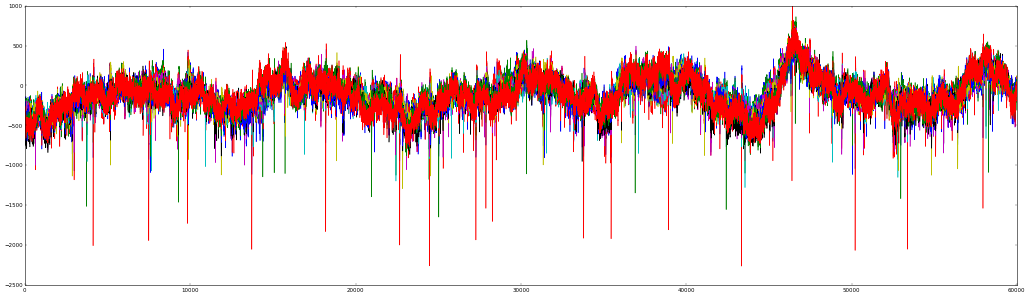

In [29]:
plt.figure(num=None, figsize=(32, 9), dpi=40, facecolor='w', edgecolor='k')
plt.plot(pop_data)

**10** Please, by using that selected neuronal population, pick some 300s-long time periods where the CV is quite stable and apply the PCA over those sliced of data.


In [30]:
a=4200
b=4500
data=np.zeros((10,1499))
#n=0
#
#for i in cluster_list:
for i in range(0,len(cluster_list)):
    
    spikes=np.array(kw.spikes_on_cluster(cluster_id=cluster_list[i]))/kw.sampling_rate()
    binnep_pop,bins=np.histogram(spikes,bins=np.arange(a,b,0.2))
    #print(binnep_pop.shape);
    #figure()
    #plot(binnep_pop)
    data[i,:]=binnep_pop
    #n=n+1

In [31]:
coeff, score, latent = princomp(data)

/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


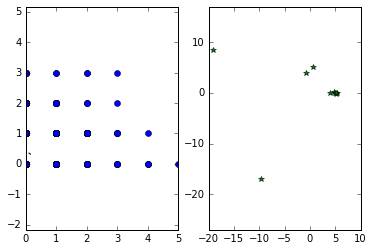

In [32]:
A=data
figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
#axis([-0.05,0.05,-1,1])
axis('equal')

show()

**References**


1 I. T. Jolliffe, Principal Component Analysis (Springer New York, 2013), Springer Series in Statistics. <br>

2 Pearson, K. (1901). On lines and planes of closest fit to systems of points in space. Philosophical Magazine, 2, 559–572.